# Simulator

Run offline simulation of the sampler. The input is a list of midi commands and the output i an audio file.

In [597]:
import subprocess

from numpy import *
from matplotlib.pyplot import *
from scipy import signal
from scipy.io import wavfile

import pandas as pd
import IPython.display as idp

## Input

In [598]:
%%writefile ../app/midi.csv
Time,   Status, Data0, Data1
0,      176,       80,     1 # Preset
10,     176,       22,     0 # Note stealing
1000,   144,       36,    63 # Note on
50000, 128,       36,     0 # Note off
51000, 144,       36,    63 # Note on
200000, 128,       36,     0 # Note off

Overwriting ../app/midi.csv


## Run simulation

In [599]:
try:
    s = subprocess.check_output(["make", "clean", "all", "SIM=1"], cwd="../app/", stderr=subprocess.STDOUT).decode()
    s = subprocess.check_output(["../app/sbnsamplersim", "300000"], cwd="../app/", stderr=subprocess.STDOUT).decode()
    print(s)
    

except subprocess.CalledProcessError as e:
    print(e.output.decode())

Simulation: 300000 samples
Loading preset 0
b0 50 01
Loading preset 1
b0 16 00
90 24 3f
80 24 00
90 24 3f
80 24 00



## Analyze

,Time,Status,Data0,Data1
0,0,176,80,1
1,10,176,22,0
2,1000,144,36,63
3,50000,128,36,0
4,51000,144,36,63
5,200000,128,36,0


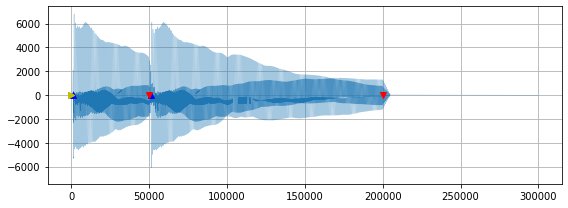

In [600]:
#%matplotlib notebook
%matplotlib inline

midi = pd.read_csv("../app/midi.csv", comment="#")
midi.columns = midi.columns.str.strip()

fs, x = wavfile.read("../app/dac.wav")
idp.display(idp.Audio("../app/dac.wav"))

fig, ax1 = subplots(1, 1, figsize=[8, 3])
t = arange(len(x))
ax1.plot(t, x, linewidth=0.2);

for n in midi.loc[midi["Status"] == 144]["Time"]:
    ax1.plot(n, 0, "^b")
    
for n in midi.loc[midi["Status"] == 128]["Time"]:
    ax1.plot(n, 0, "vr")

for n in midi.loc[midi["Status"] == 176]["Time"]:
    ax1.plot(n, 0, ">y")
    
ax1.grid(True)
ymax = max([abs(X) for X in ax1.get_ylim()])
ax1.set_ylim(-ymax, ymax)
fig.tight_layout()
idp.display(midi)

/home/soren/vcs/sbnsampler/notebooks/venv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:7739: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


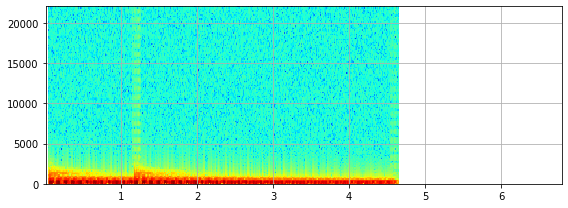

In [601]:
fig, ax = subplots(1, 1, figsize=[8, 3])
ax.specgram(x, Fs=fs, scale="dB", cmap="jet");
ax.grid(True)
fig.tight_layout()